In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
gamma = 0.05

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.198 Seconds
Building LP ...
	Done. Took 0.147 Seconds
Building M ...
	Done. Took 0.191 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 11.272
	Done. Took 0.917 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): -3.978*(-0.000)^t + 9.965*(0.084)^t + -6.400*(0.267)^t + -10.694*(0.537)^t + 13.126*(0.510)^t + -1.188*(0.131)^t + -0.831411 * delta(t,0)
		RMSE = 0.072
		Matlab: [ -3.98  -0.     9.97   0.08  -6.4    0.27 -10.69   0.54  13.13   0.51  -1.19   0.13]
	Done. Took 32.559 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): -2.257*(0.301)^t + -3.908*(0.683)^t + 2.785*(0.712)^t + 4.668*(0.076)^t + 1.146*(0.078)^t + 1.428*(0.643)^t + -3.861988 * delta(t,0)
		RMSE = 0.014
		Matlab: [-2.26  0.3  -3.91  0.68  2.79  0.71  4.67  0.08  1.15  0.08  1.43  0.64]
	Done. Took 100.145 Seco

{0: {1: array([ -3.98,  -0.  ,   9.97,   0.08,  -6.4 ,   0.27, -10.69,   0.54,  13.13,   0.51,  -1.19,   0.13]),
  2: array([-2.26,  0.3 , -3.91,  0.68,  2.79,  0.71,  4.67,  0.08,  1.15,  0.08,  1.43,  0.64])},
 1: {0: array([-2.13, -0.04,  2.62, -0.09,  1.26, -0.04,  0.45, -0.06, -3.74, -0.05,  0.04, -0.69]),
  2: array([ -3.87,  -0.06,  -6.42,  -0.03,   0.18,  -0.02,  12.28,  -0.03,  -1.63,   0.04,   4.66,   0.02])},
 2: {0: array([ 2.22,  0.05,  0.29,  0.09,  1.22, -0.24, -2.13, -0.16, -0.35,  0.01, -0.33, -0.01]),
  1: array([-8.9 ,  0.03, -3.21,  0.25,  0.9 ,  0.02,  7.53,  0.44,  4.74,  0.95, -9.4 ,  0.73])}}

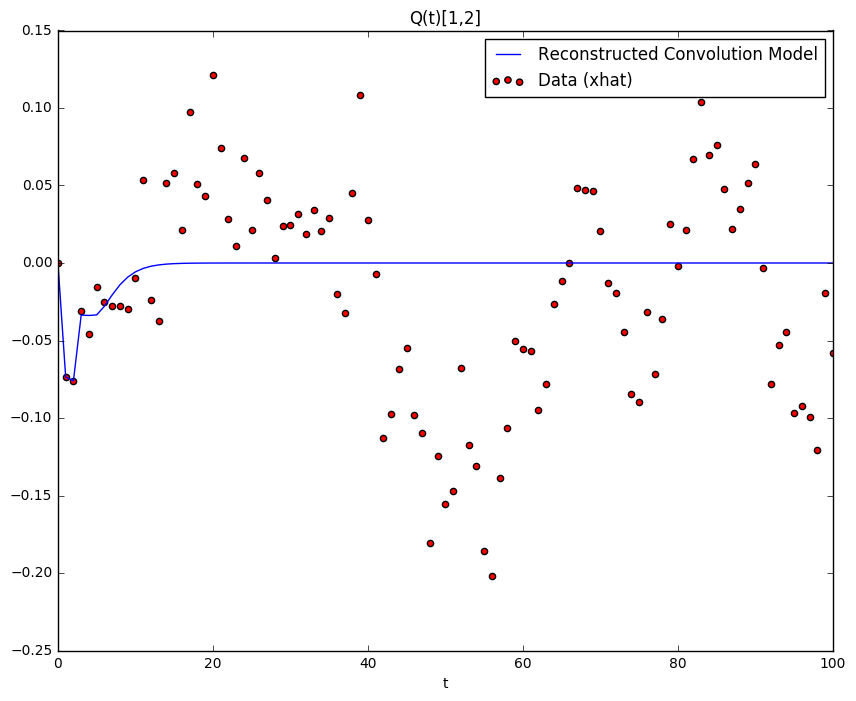

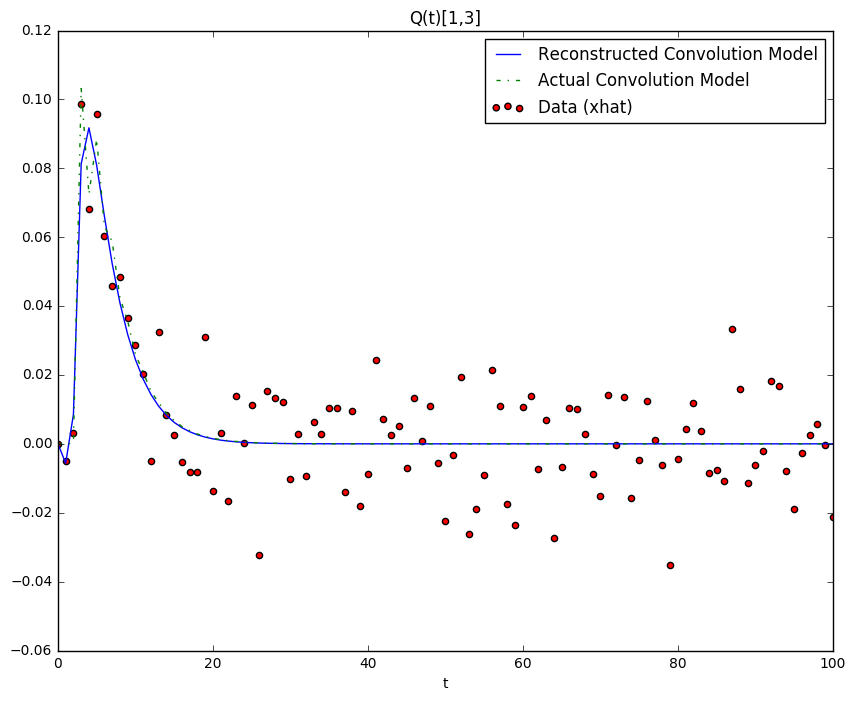

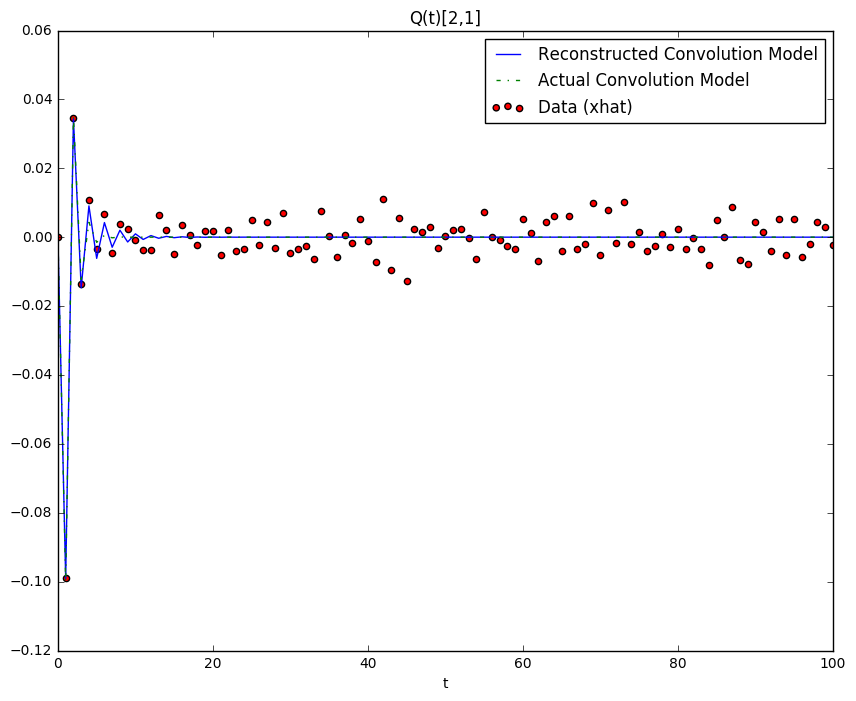

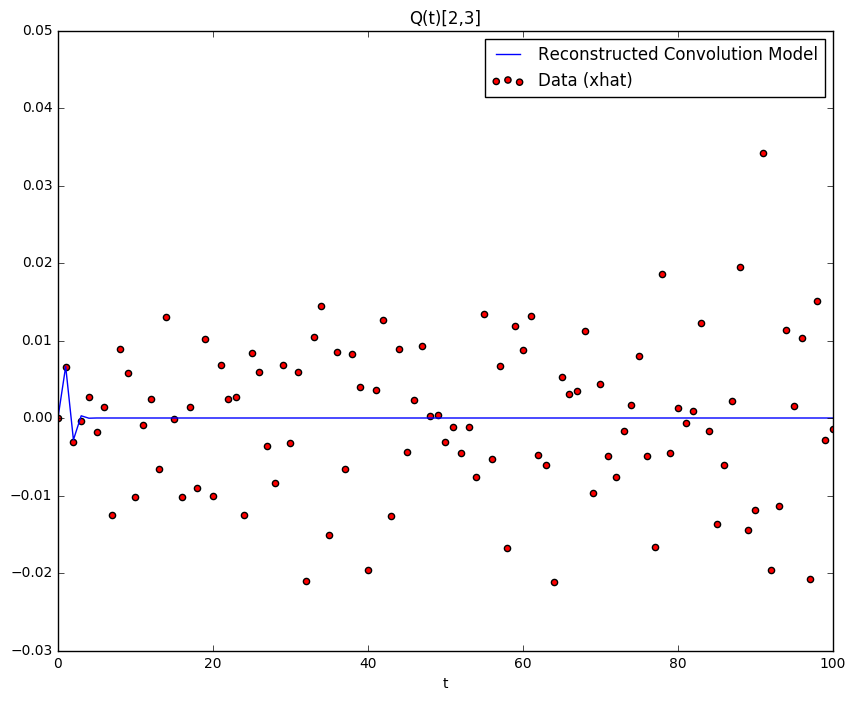

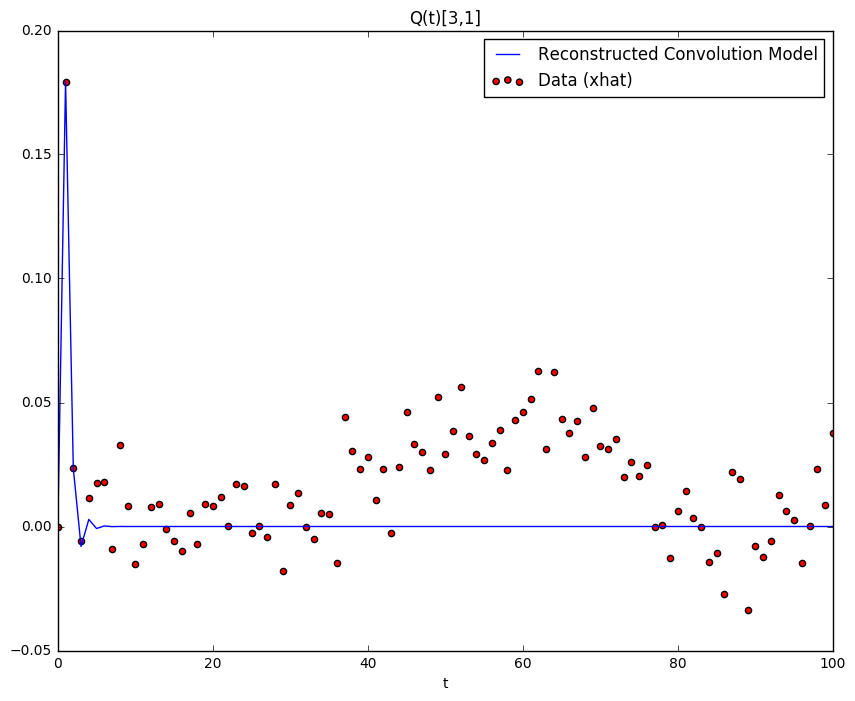

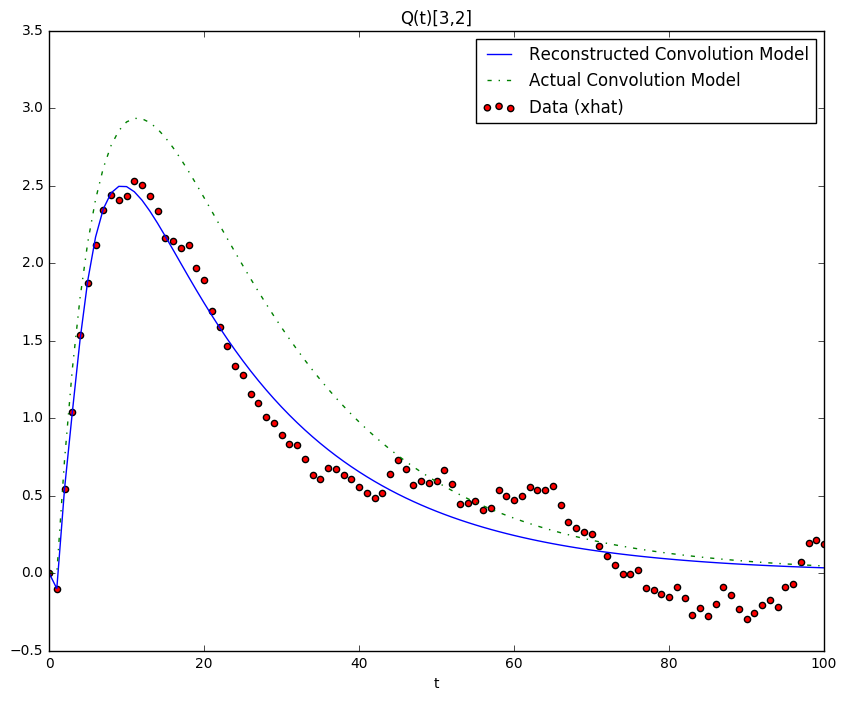

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=20, order=6, real_params=real_params, robust=False)
recon.measured(y + np.random.randn(u.shape[0], u.shape[1]) * gamma, u + np.random.randn(u.shape[0], u.shape[1]) * gamma, plot=True)  #, ij=(1,3))